In [65]:
# data manipulation and analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib as plt
import seaborn as sns

# to plot the diagrams within the cells
%matplotlib inline

In [66]:
#read csv
df = pd.read_csv('etsy_reviews.csv')

In [67]:
# get basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   reviewer       683 non-null    object
 1   date_reviewed  683 non-null    object
 2   star_rating    683 non-null    int64 
 3   message        325 non-null    object
 4   order_id       683 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 26.8+ KB


In [109]:
df.order_id.duplicated().sum()

69

In [112]:
df.duplicated().sum()

48

In [113]:
#display duplicate rows
df[df.duplicated(keep=False)]

,reviewer,date_reviewed,star_rating,message,order_id,length
34,Pat,2020-05-14,5,nan,1620919073,3
35,Pat,2020-05-14,5,nan,1620919073,3
62,Star-Lord,2020-05-08,5,nan,1616631270,3
63,Star-Lord,2020-05-08,5,nan,1616631270,3
103,Rachel,2020-04-17,5,cute arrived fast thank you,1593712018,30
...,...,...,...,...,...,...
672,naversascribbles,2015-08-29,5,nan,1033487633,3
673,naversascribbles,2015-08-29,5,nan,1033487633,3
675,Myra,2015-08-21,5,nan,1034508835,3
676,Myra,2015-08-21,5,nan,1034508835,3


In [115]:
df.shape

(683, 6)

In [116]:
#drop duplicate records
df.drop_duplicates(inplace=True)
df.shape

(635, 6)

In [117]:
#display first five rows of dataset
df.head()

,reviewer,date_reviewed,star_rating,message,order_id,length
0,Shaf,2020-05-29,5,came safely and looks just as good if not bett...,1596984696,103
1,Ellie,2020-05-29,5,this card is so cute he print quality is great...,1630295690,221
2,Star-Lord,2020-05-29,5,nan,1638973116,3
3,Ria,2020-05-28,5,love this card thank you,1649303614,26
4,kimberlygrahn,2020-05-28,5,nan,1578872704,3


In [118]:
#check datatype of 'date' column
type(df.date_reviewed[0])

pandas._libs.tslibs.timestamps.Timestamp

In [119]:
# convert date to datetime format
df['date_reviewed'] = pd.to_datetime(df['date_reviewed'])

In [120]:
#check
type(df.date_reviewed[0])

pandas._libs.tslibs.timestamps.Timestamp

In [121]:
# convert message column from float to string format
df['message'] = df['message'].astype(str)
type(df.message[0])

str

In [122]:
# creating  a  new column in dataset for number of words in review
df['length'] = df['message'].apply(len)
df.head()

,reviewer,date_reviewed,star_rating,message,order_id,length
0,Shaf,2020-05-29,5,came safely and looks just as good if not bett...,1596984696,100
1,Ellie,2020-05-29,5,this card is so cute he print quality is great...,1630295690,216
2,Star-Lord,2020-05-29,5,nan,1638973116,3
3,Ria,2020-05-28,5,love this card thank you,1649303614,24
4,kimberlygrahn,2020-05-28,5,nan,1578872704,3


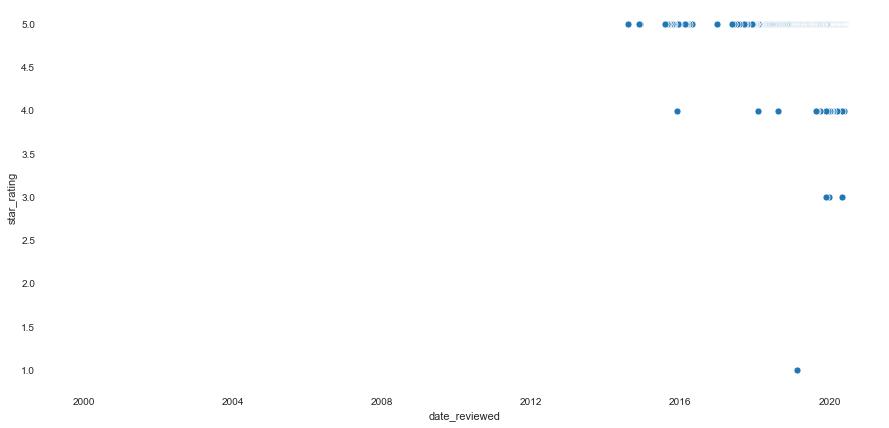

In [127]:
fig, ax = plt.subplots(figsize=(15,7))
sns.scatterplot(df.date_reviewed, df.star_rating)

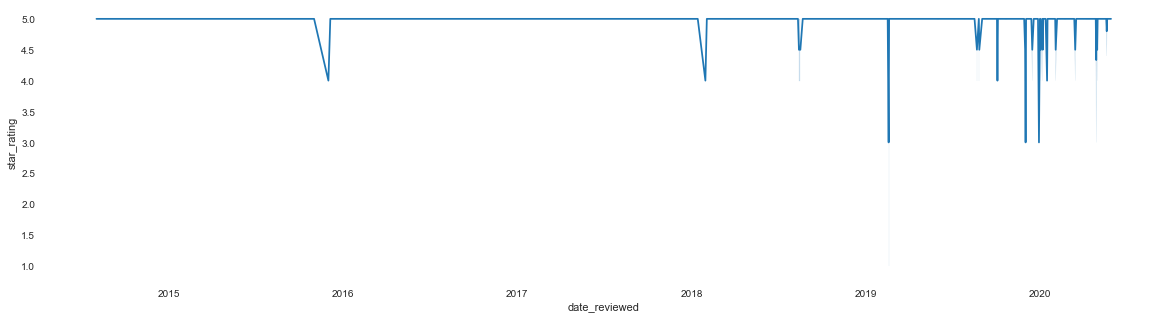

In [129]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(df.date_reviewed, df.star_rating)

In [135]:
# sales group by year
#df.groupby(df.date_reviewed.dt.year)
df1 = df['date_reviewed'].groupby([df.date_reviewed.dt.year, df.date_reviewed.dt.month]).agg('count')
df1
df1.to_csv("sales_by_year_month.csv") 

In [144]:
df2 = df['date_reviewed'].groupby([df.date_reviewed.dt.year]).agg('count')
df2.to_csv("sales_by_year.csv")
df2

date_reviewed
2014      3
2015     14
2016      6
2017     18
2018    149
2019    231
2020    214
Name: date_reviewed, dtype: int64

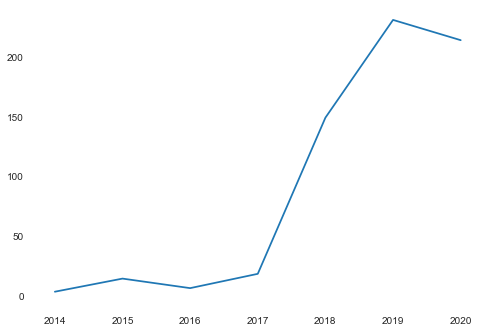

In [154]:
sns.lineplot(data=df2)


In [125]:
import re

#https://stackoverflow.com/a/49146722
emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       "]+", flags=re.UNICODE)

df['message'] = (df['message'].str.lower() #lowercase
                           .str.replace(r'[^\w\s]+', '') #rem punctuation 
                           .str.replace(emoji_pattern, '')) #rem emoji
df['message']                            

0      came safely and looks just as good if not bett...
1      this card is so cute he print quality is great...
2                                                    nan
3                               love this card thank you
4                                                    nan
                             ...                        
678                                                  nan
679                                                  nan
680                     love this print highly recommend
681                         looks great on my quote wall
682    arrived quickly good quality looks great in my...
Name: message, Length: 635, dtype: object

In [126]:
!pip install pandas-profiling
import pandas_profiling 

profile = pandas_profiling.ProfileReport(df)
profile.to_file("profile_report.html")


You should consider upgrading via the 'c:\users\csuftitan\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [96]:
#fill null values with a blank ''
df.message = df.message.fillna('')
df.message.isnull().sum()

0

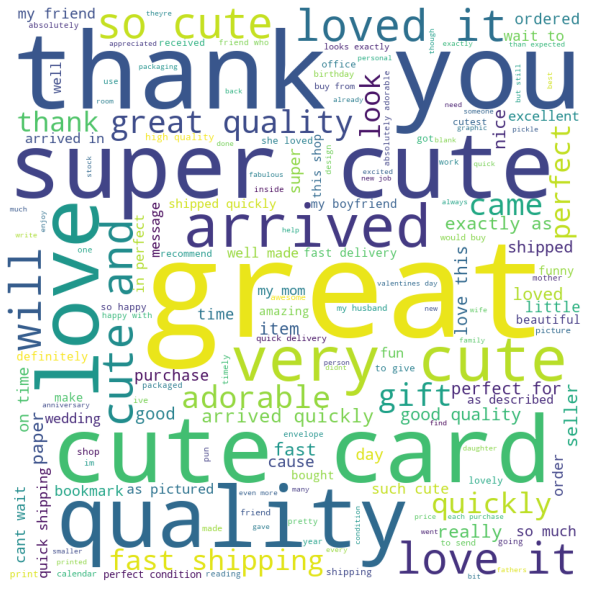

In [159]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
stopwords.add("nan")
stopwords.add("card")
stopwords.add("Card")
  
# iterate through the csv file 
for val in df.message: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 